In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df=pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\mushroom.csv")

In [4]:
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
df.describe(include='all')

Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  ...       2000   
unique               4            3         2         12  ...          2   
top               free      distant    narrow     orange  ...  universal   
freq               540          677      1007        216  ...       1010   
mean               NaN          NaN       NaN        NaN  ...        NaN   
std                NaN          NaN       NaN        NaN  ...        NaN   
min                NaN          NaN       NaN        NaN  ...        NaN   
25%                NaN          NaN       NaN        NaN  ...        NaN   
50%                NaN          NaN       NaN        NaN  ...        NaN   
75%                NaN          NaN       NaN        NaN  ...        NaN   
max                NaN          NaN       NaN        NaN  ...        NaN   

       veil_color ring_number  ring_type spore_print_color population habitat  \
count        2000        2000       2000              2000       2000    2000   
unique          4           3          8                 9          6       7   
top         white         one  sheathing             brown   abundant   urban   
freq          553         689        305               255        360     316   
mean          NaN         NaN        NaN               NaN        NaN     NaN   
std           NaN         NaN        NaN               NaN        NaN     NaN   
min           NaN         NaN        NaN               NaN        NaN     NaN   
25%           NaN         NaN        NaN               NaN        NaN     NaN   
50%           NaN         NaN        NaN               NaN        NaN     NaN   
75%           NaN         NaN        NaN               NaN        NaN     NaN   
max           NaN         NaN        NaN               NaN        NaN     NaN   

            class stalk_height cap_diameter  
count        2000  2000.000000  2000.000000  
unique          2          NaN          NaN  
top     poisonous          NaN          NaN  
freq         1400          NaN          NaN  
mean          NaN     8.449118    12.314345  
std           NaN     3.697217     7.048845  
min           NaN     2.000000     1.000000  
25%           NaN     5.291009     5.723521  
50%           NaN     8.318596    12.124902  
75%           NaN    11.781272    18.698605  
max           NaN    15.095066    25.000054  

[11 rows x 26 columns]

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
0         distant     broad       pink    tapering  ...    partial      brown   
1         crowded    narrow  chocolate   enlarging  ...  universal      brown   
2         crowded     broad     purple    tapering  ...  universal     yellow   
3           close     broad     orange   enlarging  ...    partial     yellow   
4         crowded    narrow     orange   enlarging  ...  universal      white   
...           ...       ...        ...         ...  ...        ...        ...   
1995      crowded    narrow  chocolate    tapering  ...    partial     orange   
1996      distant    narrow        red    tapering  ...    partial      white   
1997        close    narrow       pink    tapering  ...    partial      brown   
1998        close    narrow     orange   enlarging  ...  universal     yellow   
1999        close    narrow     purple   enlarging  ...    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  \
0            two   sheathing         chocolate  clustered    waste  poisonous   
1            two   sheathing             brown   numerous    waste     edible   
2            two   sheathing            purple   abundant    waste  poisonous   
3            two    cobwebby             green  clustered  grasses  poisonous   
4           none        none            yellow  clustered    urban  poisonous   
...          ...         ...               ...        ...      ...        ...   
1995         one     flaring            purple   abundant   leaves  poisonous   
1996         one        zone            yellow   numerous    waste  poisonous   
1997         two  evanescent            yellow   abundant    woods  poisonous   
1998         one    cobwebby             brown   solitary    woods  poisonous   
1999         two       large             white   numerous    urban  poisonous   

     stalk_height cap_diameter  
0       14.276173     5.054983  
1        3.952715    19.068319  
2        9.054265     7.205884  
3        5.226499    20.932692  
4       14.037532    12.545245  
...           ...          ...  
1995     5.877891    17.464145  
1996     6.500840    13.501957  
1997    13.558064    11.270020  
1998    11.092703     8.423199  
1999    13.066414    21.056642  

[2000 rows x 25 columns]

In [10]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  \
0         distant     broad       pink    tapering  ...   
1         crowded    narrow  chocolate   enlarging  ...   
2         crowded     broad     purple    tapering  ...   
3           close     broad     orange   enlarging  ...   
4         crowded    narrow     orange   enlarging  ...   
...           ...       ...        ...         ...  ...   
1995      crowded    narrow  chocolate    tapering  ...   
1996      distant    narrow        red    tapering  ...   
1997        close    narrow       pink    tapering  ...   
1998        close    narrow     orange   enlarging  ...   
1999        close    narrow     purple   enlarging  ...   

     stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
0                      gray                 yellow    partial      brown   
1                  cinnamon                  brown  universal      brown   
2                    yellow                   gray  universal     yellow   
3                    yellow                   pink    partial     yellow   
4                      gray                  white  universal      white   
...                     ...                    ...        ...        ...   
1995                   pink                 orange    partial     orange   
1996                   pink                 orange    partial      white   
1997                  brown                    red    partial      brown   
1998                   gray                   pink  universal     yellow   
1999                   gray                  brown    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  
0            two   sheathing         chocolate  clustered    waste  poisonous  
1            two   sheathing             brown   numerous    waste     edible  
2            two   sheathing            purple   abundant    waste  poisonous  
3            two    cobwebby             green  clustered  grasses  poisonous  
4           none        none            yellow  clustered    urban  poisonous  
...          ...         ...               ...        ...      ...        ...  
1995         one     flaring            purple   abundant   leaves  poisonous  
1996         one        zone            yellow   numerous    waste  poisonous  
1997         two  evanescent            yellow   abundant    woods  poisonous  
1998         one    cobwebby             brown   solitary    woods  poisonous  
1999         two       large             white   numerous    urban  poisonous  

[2000 rows x 23 columns]

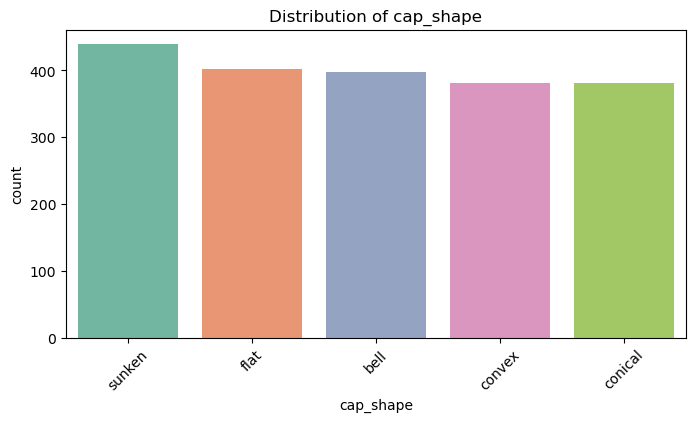

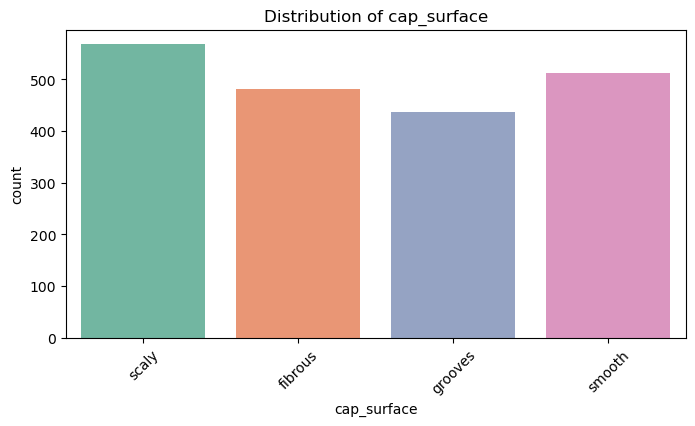

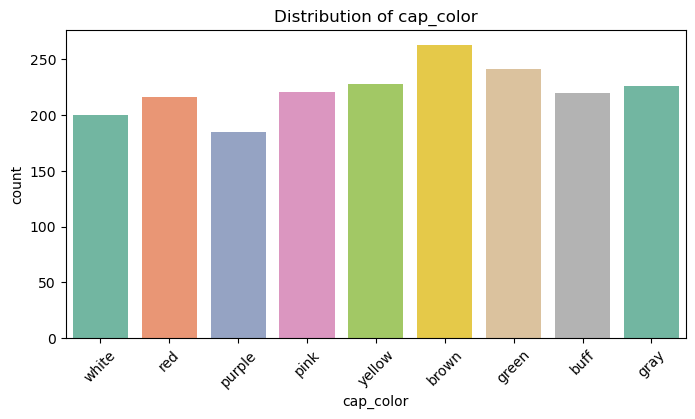

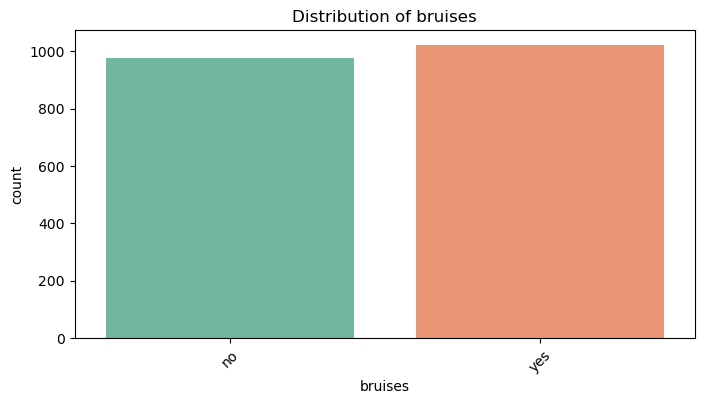

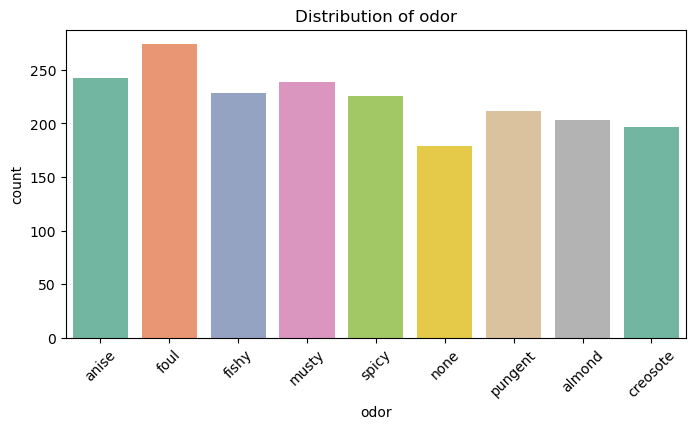

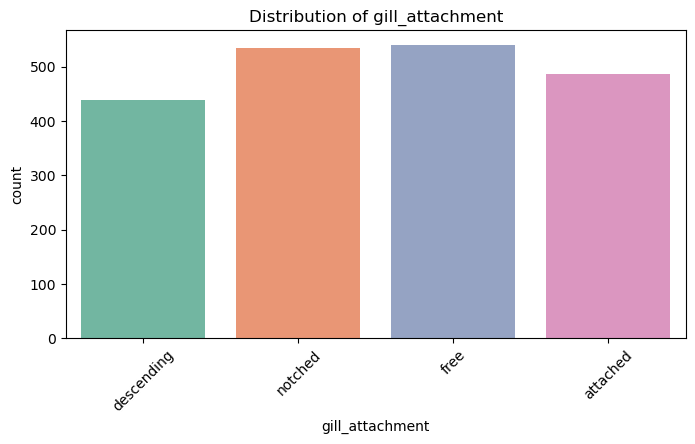

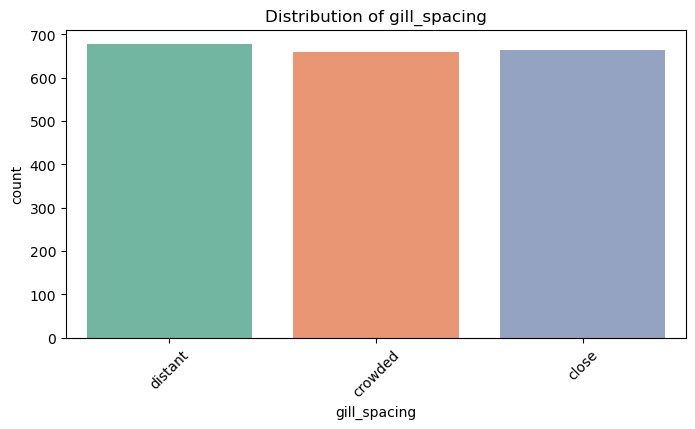

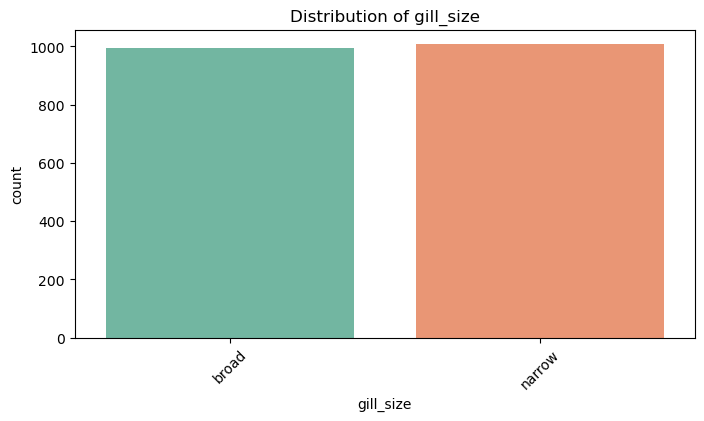

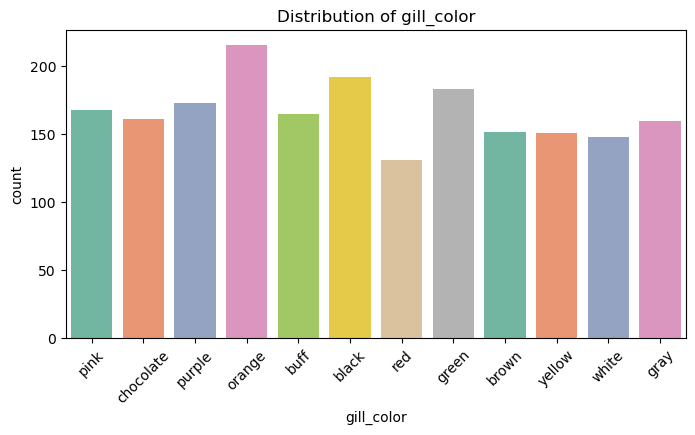

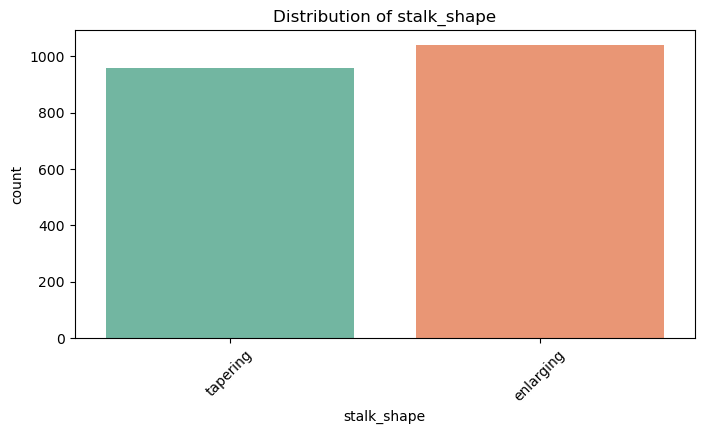

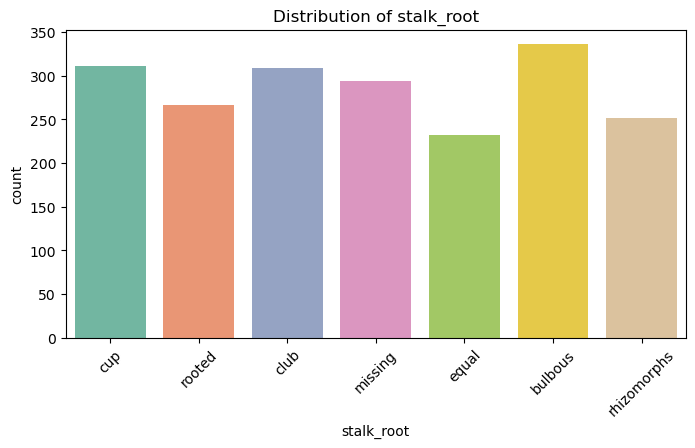

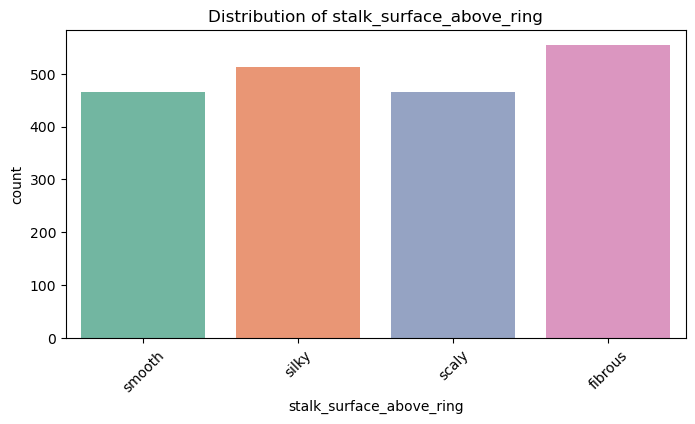

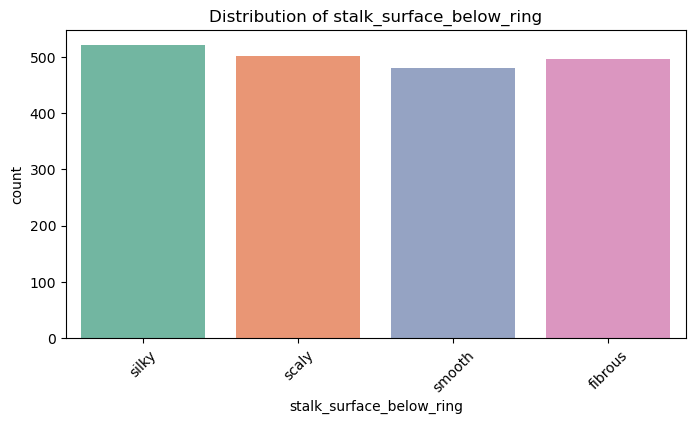

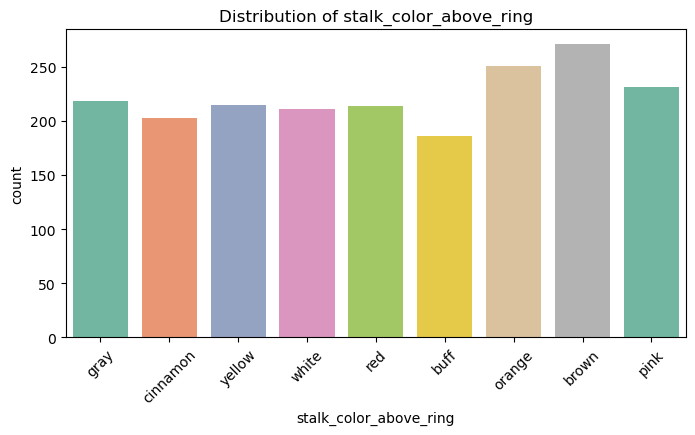

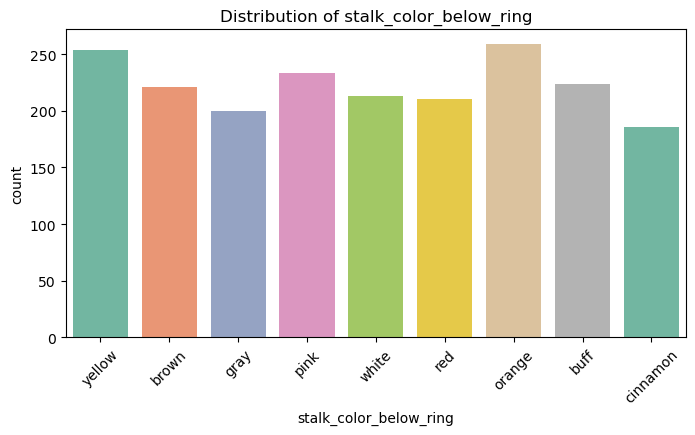

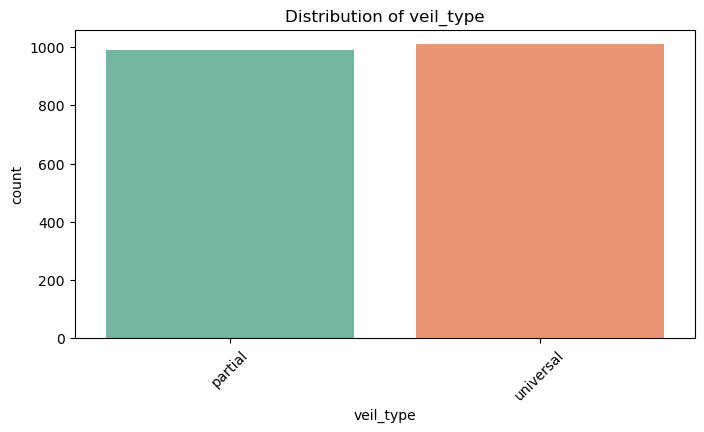

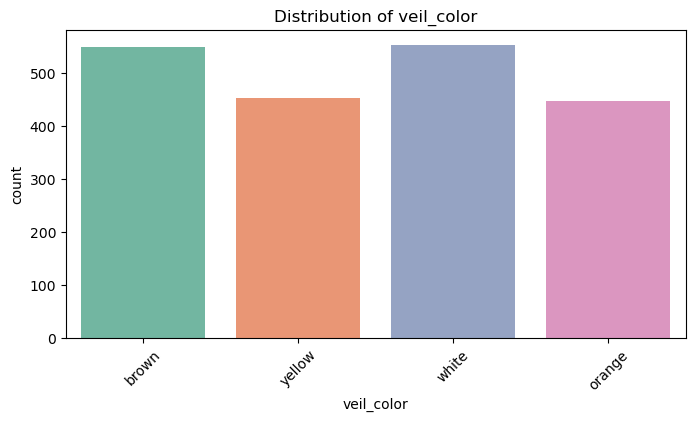

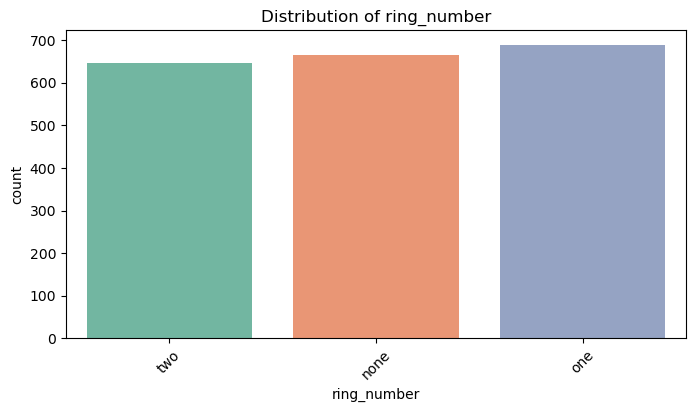

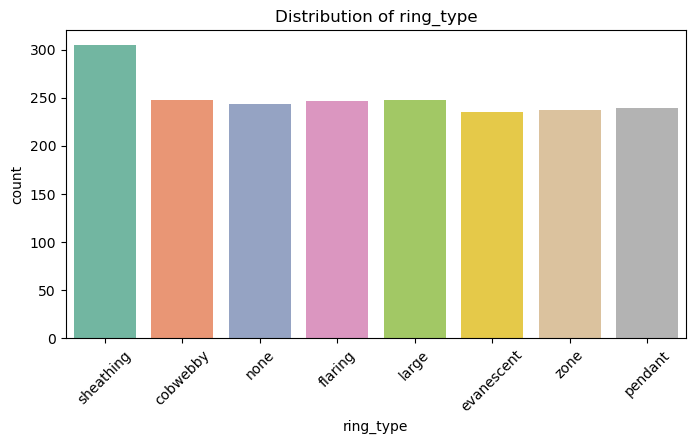

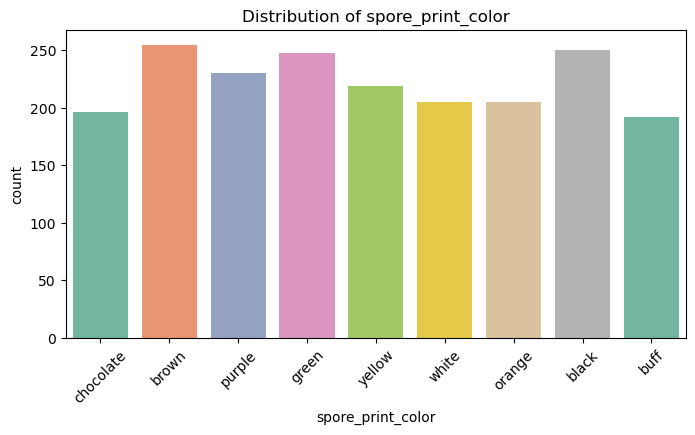

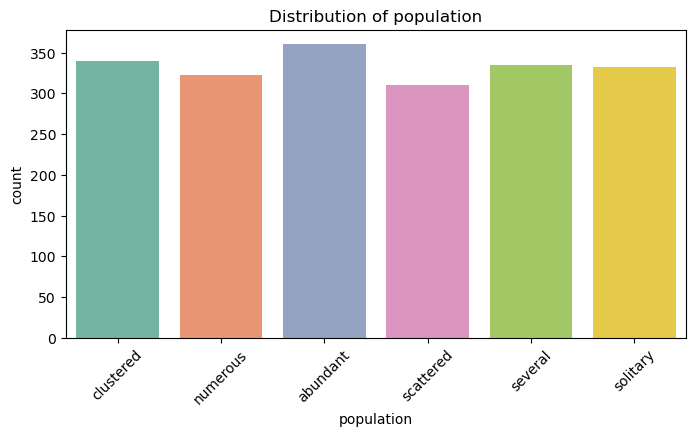

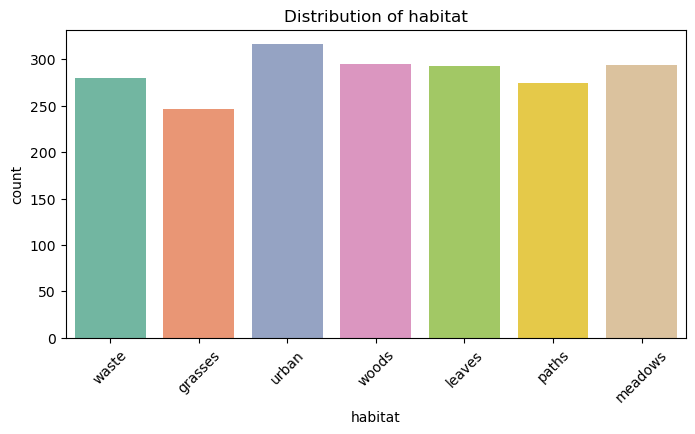

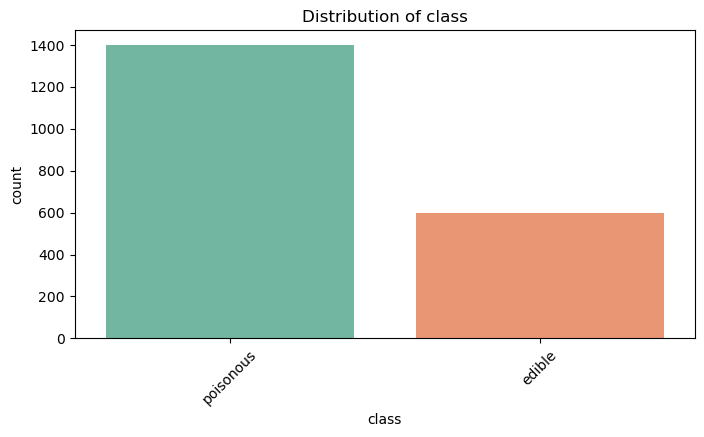

In [11]:
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
encoded_data = pd.get_dummies(df, drop_first=True)
correlation_matrix = encoded_data.corr()

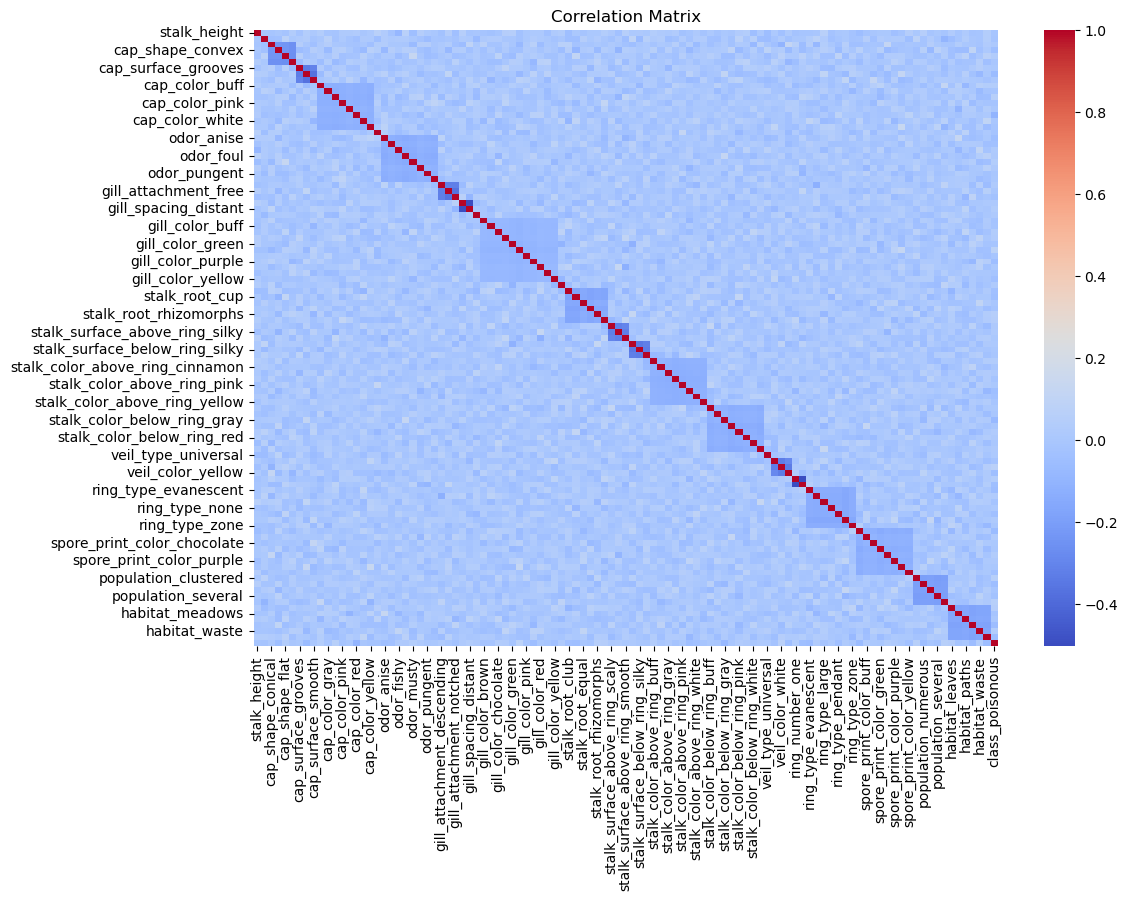

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
selected_features = df.columns  
sns.pairplot(df[selected_features], diag_kind='kde', markers='o')
plt.show()

In [15]:
# Task 2: Data Preprocessing
# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
target_column = 'class'  # Replace with actual target column after identification
X = df.drop(target_column, axis=1)
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

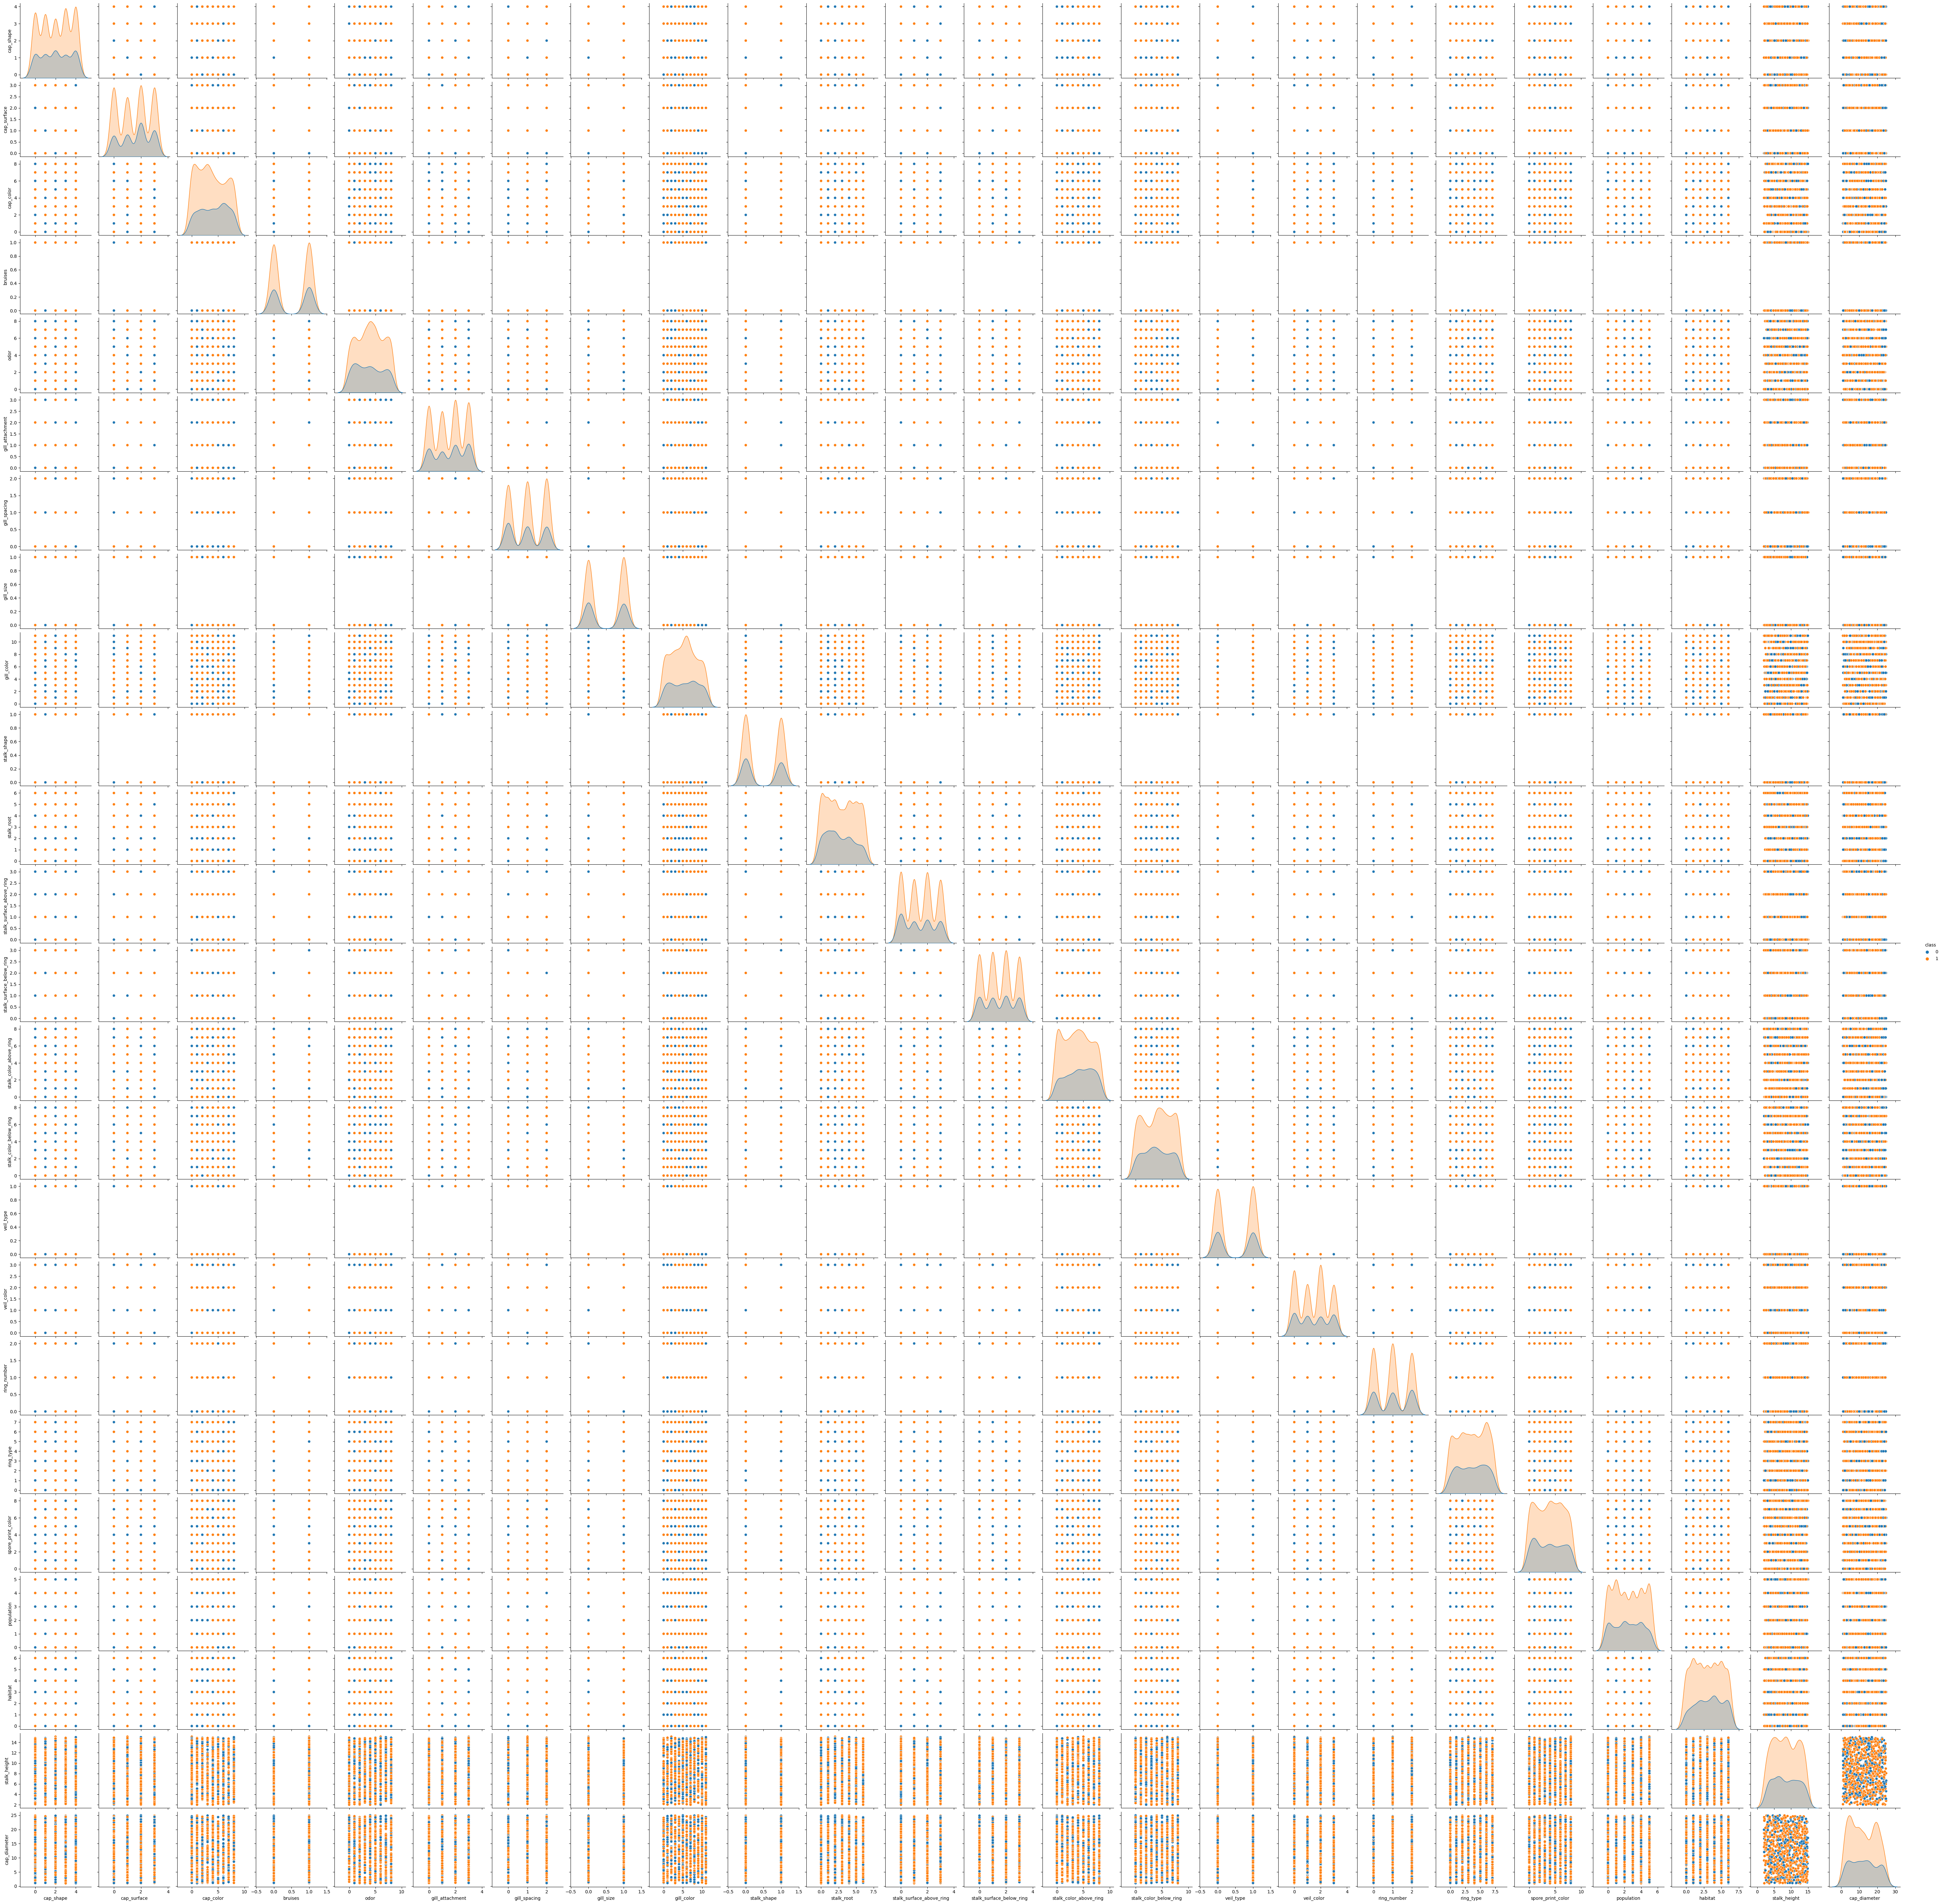

In [24]:
sns.pairplot(df, hue=target_column, diag_kind='kde')  # Replace 'class' with the target column
plt.show()

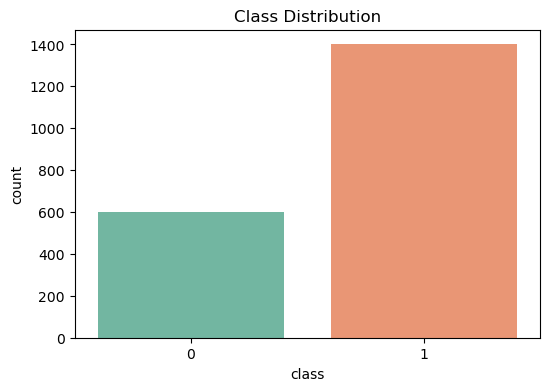

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df, palette='Set2')  
plt.title("Class Distribution")
plt.show()

In [19]:
# Task 4: SVM Implementation
# Training an SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [20]:
y_pred = svm_model.predict(X_test)
classification_report(y_test, y_pred)

C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       133\n           1       0.67      1.00      0.80       267\n\n    accuracy                           0.67       400\n   macro avg       0.33      0.50      0.40       400\nweighted avg       0.45      0.67      0.53       400\n'

In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  0 133]
 [  0 267]]
Accuracy Score:
0.6675


In [22]:
if X_train.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, palette='Set2', alpha=0.7)
    plt.title("SVM Classification Results")
    plt.show()

In [23]:
for kernel in ['linear', 'poly', 'rbf']:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"\nResults for kernel={kernel}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))


Results for kernel=linear:
Accuracy: 0.6675

Results for kernel=poly:
Accuracy: 0.6925

Results for kernel=rbf:
Accuracy: 0.6675


In [ ]:
print("\nSVM performs well on balanced datasets and is effective for high-dimensional spaces.")
print("Considerations include tuning hyperparameters like the kernel type and regularization.")